## Bibliotecas a utilizar

In [1]:
from os import scandir
import numpy as np
import pandas as pd
import altair as alt
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Enlaces

In [2]:
def g_archivos(ruta = './clean_data/Indicadores_Gestion/'):
    """ Generate the list with the path files of all files """
    return sorted([archivo.path for archivo in scandir(ruta) if archivo.is_file()])


def enlace_df(ramo):
    ramo = ramo.upper()
    d_ramos = {'PAT': 0, 'ART': 1, 'TRANSPORTE': 2, 'VIDA': 3, 'RETIRO': 4}
    l_enlaces = g_archivos()
    return pd.read_csv(l_enlaces[d_ramos[ramo]], index_col=0)

    
def porcentaje_mercado(ramo):
    df = enlace_df(ramo)                        # A: Now the CSV is a Data Frame
#=================
    df['Fecha'] = df['Fecha'].astype('category', inplace=True)
#=================
    l_fechas = df['Fecha'].unique()             # U: A list to iterate betwen the dates
    count_fechas = len(l_fechas)                # ¿?
    
    for fecha in l_fechas:
        tmp = df[df['Fecha'] == fecha]          # A: The Data Frame is filtered by year

    return df
    
    
tmp = porcentaje_mercado('RETIRO')

# https://altair-viz.github.io/gallery/select_detail.html


In [3]:
tmp['Fecha'].dtype

CategoricalDtype(categories=['2012-03', '2012-06', '2012-09', '2012-12', '2013-03',
                  '2013-06', '2013-09', '2013-12', '2014-03', '2014-06',
                  '2014-09', '2014-12', '2015-03', '2015-06', '2015-09',
                  '2015-12', '2016-03', '2016-06', '2016-09', '2016-12',
                  '2017-03', '2017-06', '2017-09', '2017-12', '2018-03',
                  '2018-06'],
                 ordered=False)

In [ ]:
selection = alt.selection_multi(fields=['Origin'])
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(cars).mark_point().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

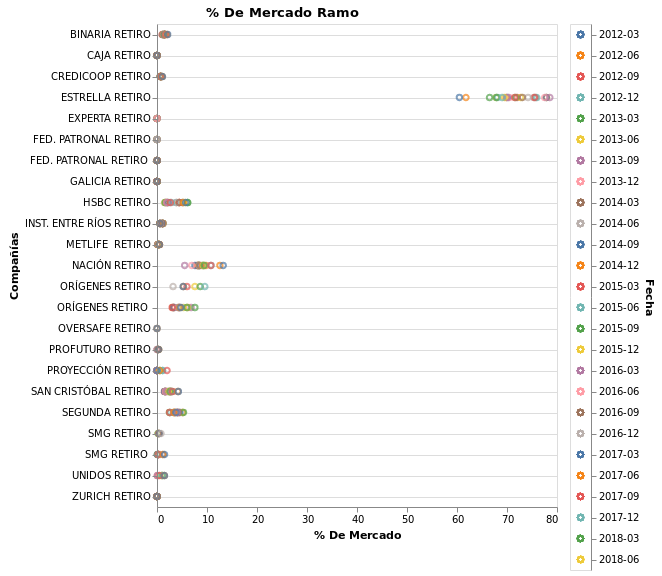

In [38]:
source = tmp
selection = alt.selection_multi(fields=['Fecha'])

color = alt.condition(selection,
                      alt.Color(shorthand='Fecha:N', 
                                legend = None),
                      alt.value('lightgray'))

x = alt.X('% Mercado',axis = alt.Axis(grid=False, title= '% De Mercado')
         )

y = alt.Y('Denominación', axis = alt.Axis(title='Compañías', grid=True)
         )


scatter = alt.Chart(source, title = "% De Mercado Ramo").mark_point(
            ).encode(
                    x = x,
                    y = y,
                    color = color,
                     )

legend = alt.Chart(source).mark_point(
            ).encode(    
                y=alt.Y('Fecha:N', axis=alt.Axis(orient='right')),
                color = color
                ).add_selection(
                        selection
                    )
chart = scatter | legend
chart.save('./plots/%_Mercado/porMercado_RETIRO.html')
chart

# https://altair-viz.github.io/gallery/seattle_weather_interactive.html
# https://altair-viz.github.io/user_guide/interactions.html

In [ ]:
,
,
                

# % Mercado en los últimos años

In [ ]:
enlace_PAT = './clean_data/PAT.csv'
enlace_ART = './clean_data/ART.csv'
enlace_TRANSPORTE = './clean_data/TRANSPORTE.csv'
enlace_VIDA = './clean_data/VIDA.csv'
enlace_RETIRO = './clean_data/RETIRO.csv'

In [10]:
def porMercado(df, nombre='Test'):
    
    count = len(df.Fecha.unique())


    # ============================ Iterando por fechas ===============================
    for i in df.Fecha.unique():
        tmp = df[df.Fecha == i]
        
        
    # ========================= Agregando celda % de Mercado =========================
        p_mercado = tmp['%\nProducción\nTotal'].sum()
        tmp['% Mercado'] = round(tmp['%\nProducción\nTotal']*100/p_mercado,2)
        
        
    # ========================= Eliminando % de Mercado == 0 =========================
        tmp_1 = tmp[tmp['% Mercado']>0]
        
        
    # ============================== Valores dinámicos ===============================   
        if nombre == 'PAT':
            nramo = 'RIESGOS VARIOS' 
            fig = plt.figure(figsize=(900/96,1400/96),dpi=96)
            plt.xlim(0,16)
            plt.margins(y=0.01)
            y_suptit = 0.94
            y_text = -0.07
            
        elif nombre == 'ART':
            nramo = 'ART'
            fig = plt.figure(figsize=(900/96,900/96),dpi=96)
            plt.xlim(0,25)
            plt.margins(y=0.04)
            y_suptit = 0.96
            y_text = -0.10
            
        elif nombre == 'TRANSPORTE':
            nramo = 'TRANSPORTE'
            fig = plt.figure(figsize=(900/96,600/96),dpi=96)
            plt.xlim(0,75)
            plt.margins(y=0.04)
            y_suptit = 1
            y_text = -0.15
            
        elif nombre == 'VIDA':
            nramo = 'VIDA'
            fig = plt.figure(figsize=(900/96,900/96),dpi=96)
            plt.xlim(0,50)
            plt.margins(y=0.04)
            y_suptit = 0.96
            y_text = -0.10
            
        else:
            nramo = 'RETIRO'
            fig = plt.figure(figsize=(900/96,900/96),dpi=96)
            plt.xlim(0,90)
            plt.margins(y=0.04)
            y_suptit = 0.96
            y_text = -0.10
            
            
    # ============================== Realizando el plott =============================
        sns.set_style('darkgrid')
        ax = sns.scatterplot(x = '% Mercado',
                             y = 'Denominación',
                             size = '% Mercado',
                             sizes = (100,700),
                             hue = '% Mercado',
                             data = tmp_1,
                             palette = 'viridis',
                            )
      
        
    # ================================ Forma del plott ===============================
        plt.suptitle('% DE MERCADO EN EL RAMO {}'.format(nramo), 
                     fontsize=18, fontweight='bold', y = y_suptit)
        plt.ylabel('{}'.format(i), 
                   fontsize=16,fontweight='bold')
        plt.xlabel('% de mercado', 
                   fontsize=16,fontweight='bold')
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), 
                   loc='lower left', ncol=6, 
                   mode="expand", borderaxespad=0., )
        plt.tick_params(axis='y', labelsize = 7, labelbottom = True ) # labelrotation=45, length=25, pad = 25,length=15, grid_linewidth = 3

        plt.ylim()
        plt.text(0.2, y_text, 'Ramiro Gallo - https://www.linkedin.com/in/ramirogallo', {'color': '#E91E63FF', 'fontsize': 14},
                 horizontalalignment='left', verticalalignment='center', clip_on=False, transform=plt.gca().transAxes)
        

    # ============================== Guardando el plott =============================
        nombre_archivo = './plots/%_Mercado/porMercado_'+nombre+str(count).zfill(4)+'.jpg'       
        plt.savefig(nombre_archivo, dpi=96,bbox_inches='tight')                      
        plt.gca()
        
        count -= 1
        
    

**Hacer gif Patrimonial**  
convert -delay 100 -loop 1 porMercado_PAT*.jpg porMercado_PAT.gif  
  
**Hacer gif ART**  
convert -delay 100 -loop 1 porMercado_ART*.jpg porMercado_ART.gif  
  
**Hacer gif Transporte**  
convert -delay 100 -loop 1 porMercado_TRANSPORTE*.jpg porMercado_TRANSPORTE.gif  
  
**Hacer gif VIDA**  
convert -delay 100 -loop 1 porMercado_VIDA*.jpg porMercado_VIDA.gif  
  
**Hacer gif Retiro**  
convert -delay 100 -loop 1 porMercado_RETIRO*.jpg porMercado_RETIRO.gif

In [13]:
df_PAT = pd.read_csv(enlace_PAT, index_col=0)
df_ART = pd.read_csv(enlace_ART, index_col=0)
df_TRANSPORTE = pd.read_csv(enlace_TRANSPORTE, index_col=0)
df_VIDA = pd.read_csv(enlace_VIDA, index_col=0)
df_RETIRO = pd.read_csv(enlace_RETIRO, index_col=0)

#porMercado(df_PAT, 'PAT')
#porMercado(df_ART, 'ART')
#porMercado(df_TRANSPORTE, 'TRANSPORTE')
#porMercado(df_VIDA, 'VIDA')
#porMercado(df_RETIRO, 'RETIRO')

# % Mercado vs Capacidad Respuesta  -  Scatter Plot 

In [42]:
def mercVsCapacidad(df, nombre='Test'):
    
    count = len(df.Fecha.unique())


    # ============================ Iterando por fechas ===============================
    for i in df.Fecha.unique():
        tmp = df[df.Fecha == i]
    
    
    # ============================== Valores dinámicos ===============================   
        if nombre == 'PAT':
            nramo = 'RIESGOS VARIOS' 
            fig = plt.figure(figsize=(900/96,1400/96),dpi=96)
            plt.xlim(0,16)
            plt.margins(y=0.01)
            y_suptit = 0.96
            y_text = -0.07
            
        elif nombre == 'ART':
            nramo = 'ART'
            fig = plt.figure(figsize=(900/96,900/96),dpi=96)
            plt.xlim(0,25)
            plt.margins(y=0.04)
            y_suptit = 0.99
            y_text = -0.10
            
        elif nombre == 'TRANSPORTE':
            nramo = 'TRANSPORTE'
            fig = plt.figure(figsize=(900/96,600/96),dpi=96)
            plt.xlim(0,75)
            plt.margins(y=0.04)
            y_suptit = 1.06
            y_text = -0.15
            
        elif nombre == 'VIDA':
            nramo = 'VIDA'
            fig = plt.figure(figsize=(900/96,900/96),dpi=96)
            plt.xlim(0,50)
            plt.margins(y=0.04)
            y_suptit = 0.99
            y_text = -0.10
            
        else:
            nramo = 'RETIRO'
            fig = plt.figure(figsize=(900/96,900/96),dpi=96)
            plt.xlim(0,90)
            plt.margins(y=0.04)
            y_suptit = 1
            y_text = -0.10
        
    # ========================= Agregando celda % de Mercado =========================
        p_mercado = tmp['%\nProducción\nTotal'].sum()
        tmp['% Mercado'] = round(tmp['%\nProducción\nTotal']*100/p_mercado,2)
       
        
    # ============================== Realizando el plott =============================
        sns.set_style('darkgrid')
        ax = sns.scatterplot(x = '% Mercado',
                             y = 'Denominación',
                             size = '%\n[(Dispon.+ Invers.) /\nDeudas c/Aseg.]',
                             sizes = (100,700),
                             hue = '%\n[(Dispon.+ Invers.) /\nDeudas c/Aseg.]',
                             data = tmp,
                             palette = 'viridis',
                            )
        
        
    # ================================ Forma del plott ===============================
        plt.suptitle('% CAPACIDAD DE RESPUESTA EN EL RAMO {}'.format(nramo), 
                     fontsize=18, fontweight='bold', y = y_suptit)
        plt.ylabel('{}'.format(i), 
                   fontsize=16,fontweight='bold')
        plt.xlabel('% de mercado', 
                   fontsize=16,fontweight='bold')
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, 
                   mode="expand", borderaxespad=0., )
        plt.tick_params(axis='y', labelsize = 8, labelbottom = True ) # labelrotation=45, length=25, pad = 25,length=15, grid_linewidth = 3
        plt.ylim()
        plt.text(0.2, y_text, 'Ramiro Gallo - https://www.linkedin.com/in/ramirogallo', {'color': '#E91E63FF', 'fontsize': 14},
                 horizontalalignment='left', verticalalignment='center', clip_on=False, transform=plt.gca().transAxes)
        
        
    # ============================== Guardando el plott =============================
        nombre_archivo = './plots/MercadoVsRespuesta/MercVsCap_'+nombre+str(count).zfill(4)+'.jpg'       
        plt.savefig(nombre_archivo, dpi=96,bbox_inches='tight')                      
        plt.gca()
        
        count -= 1

In [44]:
df_PAT = pd.read_csv(enlace_PAT, index_col=0)
df_ART = pd.read_csv(enlace_ART, index_col=0)
df_TRANSPORTE = pd.read_csv(enlace_TRANSPORTE, index_col=0)
df_VIDA = pd.read_csv(enlace_VIDA, index_col=0)
df_RETIRO = pd.read_csv(enlace_RETIRO, index_col=0)

#mercVsCapacidad(df_PAT, 'PAT')
#mercVsCapacidad(df_ART, 'ART')
#mercVsCapacidad(df_TRANSPORTE, 'TRANSPORTE')
#mercVsCapacidad(df_VIDA, 'VIDA')
#mercVsCapacidad(df_RETIRO, 'RETIRO')

**Hacer gif Patrimonial**  
convert -delay 100 -loop 1 MercVsCap_PAT*.jpg MercVsCap_PAT.gif  
  
**Hacer gif ART**  
convert -delay 100 -loop 1 MercVsCap_ART*.jpg MercVsCap_ART.gif  
  
**Hacer gif Transporte**  
convert -delay 100 -loop 1 MercVsCap_TRANSPORTE*.jpg MercVsCap_TRANSPORTE.gif  
  
**Hacer gif VIDA**  
convert -delay 100 -loop 1 MercVsCap_VIDA*.jpg MercVsCap_VIDA.gif  
  
**Hacer gif Retiro**  
convert -delay 100 -loop 1 MercVsCap_RETIRO*.jpg MercVsCap_RETIRO.gif

In [35]:
dlist = df_ART.Fecha.unique()
dlist

array(['06-2018', '03-2018', '12-2017', '09-2017', '06-2017', '03-2017',
       '12-2016', '09-2016', '06-2016', '03-2016', '12-2015', '09-2015',
       '06-2015', '03-2015', '12-2014', '09-2014', '06-2014', '03-2014',
       '12-2013', '09-2013', '06-2013', '03-2013', '12-2012', '09-2012',
       '06-2012', '03-2012'], dtype=object)

convert -delay 55 -loop 0 MercVsCap_PAT*.jpg MercVsCap_PAT.gif

# % Mercado vs Superávit  -  Scatter Plot 